# A Finite Element Examples: Beam 01

This example is based on the beam01 example distributed with FEM.edu

Class demo

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.elements.Beam2D import *
from femedu.materials.ElasticSection import ElasticSection

## Build a model

In [3]:
# initialize a system model
SpanLength = 10.0 * 12
w =  -1.0   # distributed load (positive if acting in local y-direction
P =   -40.0   # center point load (uses global system)

Nelems = 4    # number of elements
params = {'E': 29000., 'A': 4.7, 'I':103}

model = System()

# meshing parameters
Le = SpanLength / Nelems
Xnode = 0.0
Ynode = 0.0

# create left node
nd0 = Node(Xnode, Ynode)
model += nd0

ndP = None

# initialization for node and element creation
ndi = nd0

for e in range(Nelems):
    # create next node
    Xnode += Le
    ndj = Node(Xnode, Ynode)
    model += ndj

    # remember center node for loading
    if Xnode <= SpanLength/2:
        ndP = ndj

    # create elements
    elem = Beam2D(ndi, ndj, ElasticSection(params))
    model += elem

    # load the element
    elem.setDistLoad(w)

    # shift one node to the right
    ndi = ndj

# define support(s)
nd0.fixDOF('ux', 'uy')     # pin support left end
ndj.fixDOF('uy')           # roller support right end

# add point loads
# .. load only the center node
if ndP:
    ndP.setLoad([0.0, P], ('ux', 'uy'))

## Solve the system equations

In [4]:
# analyze the model
model.solve()

In [5]:
# get a lot of info on the analysis
model.report()


System Analysis Report

Nodes:
---------------------
  Node 0: {'uy': 0, 'rz': 1}
          x:[0. 0.], fix:['ux', 'uy'], 
          P:[0. 0.], u:[ 0.         -0.03615668]
  Node 1: {'uy': 0, 'rz': 1}
          x:[30.  0.], fix:[], 
          P:[0. 0.], u:[-0.97547707 -0.02561098]
  Node 2: {'uy': 0, 'rz': 1}
          x:[60.  0.], fix:[], 
          P:[-40.   0.], u:[-1.38600603e+00 -1.37017950e-17]
  Node 3: {'uy': 0, 'rz': 1}
          x:[90.  0.], fix:[], 
          P:[0. 0.], u:[-0.97547707  0.02561098]
  Node 4: {'uy': 0, 'rz': 1}
          x:[120.   0.], fix:['uy'], 
          P:[0. 0.], u:[0.         0.03615668]

Elements:
---------------------
  Beam2D: node 0 to node 1:
     material ElasticSection properties: {'E': 29000.0, 'A': 4.7, 'I': 103, 'nu': 0.0, 'fy': 1e+30}  strain:{'axial': 0.0, 'flexure': 0.0}   stress:{'axial': 0.0, 'flexure': 0.0}
     nodal forces: Vi:65.0 Mi:-74.99999999999909 Vj:-65.0 Mj:2024.999999999989
  Beam2D: node 1 to node 2:
     material ElasticSect

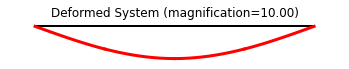

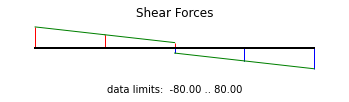

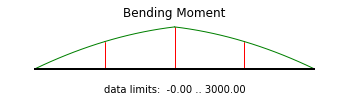

In [5]:
# create plots
model.plot(factor=10., filename="beam01_deformed.png")

model.beamValuePlot('V', filename="beam01_shear.png")
model.beamValuePlot('M', filename="beam01_moment.png")

In [6]:
# extracting information for a single node
print(ndP)

Node 2: {'uy': 0, 'rz': 1}
        x:[60.  0.], fix:[], 
        P:[-40.   0.], u:[-1.38600603e+00 -1.37017950e-17]
